In [1]:
import cv2
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from keras_preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from PIL import Image

# File Name Cutting & Size Unification

fileList = os.listdir('./realData/')
count = 1
for file in fileList:
    fileNumber = file.split('-')[1]
    img = Image.open('./realData/' + file)
    img_resize = img.resize((600, 600))
    if(file.split('-')[2] == '001.jpg') or (file.split('-')[2] == '01.jpg'):
        count = 1
    img_resize.save('./ImageSizeUnificated600/resized.' + fileNumber + '(' + str(count) + ').png')
    count += 1

# -------------------------------------------------------------------------------------------------------

# Image Gray Scaler

fileList = os.listdir('./ImageSizeUnificated600/')
for file in fileList:
    fileNumber = file.split('.')[1]
    imageName = './ImageSizeUnificated600/resized.' + fileNumber + '.png'
    image = cv2.imread(imageName, cv2.IMREAD_COLOR)
    if image is None:
        print('Could not open or find the Image')
    grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.imwrite("./grayImages600/" + fileNumber + '.png', grayImage)

# -------------------------------------------------------------------------------------------------------

# Image Rotate Unification

filenames = os.listdir("./grayImages1024/")

for filename in filenames:
    fileNumber = filename.split('.')[0]
    willStoreFileFullName = "./grayImages1024RotateUnification/" + fileNumber + ".png"
    
    img = cv2.imread("./grayImages1024/"+filename)
    h, w, c = img.shape
    if h == 1024:
        imageRotated = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
        cv2.imwrite(willStoreFileFullName, imageRotated)
    else:
        cv2.imwrite(willStoreFileFullName, img)

# Check

filenames = os.listdir("./grayImages1024RotateUnification/")

for filename in filenames:
    img = cv2.imread("./grayImages1024RotateUnification/" + filename)
    h, w, c = img.shape
    if h != 768:
        print("!!")

# -------------------------------------------------------------------------------------------------------

In [99]:
filenames = os.listdir("./grayImages600/")
categories = []
for filename in filenames:
    category = filename.split('.')[0][:4]
    categories.append(category)
    
df = pd.DataFrame({
    'filename' : filenames,
    'category' : categories
})

# -------------------------------------------------------------------------------------------

In [100]:
df.sort_values(by='category', ascending=True)

,filename,category
0,3001(1).png,3001
1,3001(2).png,3001
2,3001(3).png,3001
3,3001(4).png,3001
4,3001(5).png,3001
...,...,...
2111,6022(2).png,6022
2110,6022(10).png,6022
2109,6022(1).png,6022
2112,6022(3).png,6022


df.to_csv('./label.csv')

# -------------------------------------------------------------------------------------------------------

# Label Count

In [101]:
len(df['category'].unique())

258

# -------------------------------------------------------------------------------------------------------

3041(2).png


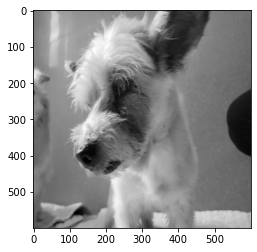

In [102]:
sample = random.choice(filenames)
print(sample)
image = load_img("./grayImages600/"+sample)
plt.imshow(image)

# -------------------------------------------------------------------------------------------------------

# Data Labeling
## -------------------------------------------------------
## train target data / size : 28x28

In [103]:
train_target = np.array(df['category'])

In [104]:
train_target

array(['3001', '3001', '3001', ..., '6022', '6022', '6022'], dtype=object)

In [105]:
train_target = train_target.astype('uint8')

In [106]:
train_target

array([185, 185, 185, ..., 134, 134, 134], dtype=uint8)

In [107]:
print('dtype : ' ,train_target.dtype)
print('type : ', type(train_target))
print('shape : ', train_target.shape)
print('unique : ', np.unique(train_target, return_counts=True))

dtype :  uint8
type :  <class 'numpy.ndarray'>
shape :  (2119,)
unique :  (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 134, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
       206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,
       219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231,
       232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244,
       245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255], dtype=uint8), array([ 9, 35, 10, 24,  6, 15,  4, 17, 18, 15,  3, 13,  

# -------------------------------------------------------------------------------------------------------

# 1개 짜리 데이터 삭제
## 삭제 대상

deleteTarget = []

targetNumber = (np.unique(train_target, return_counts=True))[0]
countes = (np.unique(train_target, return_counts=True))[1]

for i in range(0, len(countes)):
    if countes[i] == 1:
        deleteTarget.append(targetNumber[i])

print(deleteTarget)

## 삭제

for i in range(0, len(countes)):
    if countes[i] == 1:
        if os.path.isfile('./grayImages600/' + targetNumber[i] + '(1).png'):
            os.remove('./grayImages600/' + targetNumber[i] + '(1).png')

fileList = os.listdir('./grayImages600/')
totalFileCount = 0
for file in fileList:
    totalFileCount += 1
    
print(totalFileCount)

# -------------------------------------------------------------------------------------------------------

# train input data

In [108]:
train_input = []

In [109]:
filenames = os.listdir("./grayImages600/")
for filename in filenames:
    train_input.append( np.array(Image.open('./grayImages600/' + filename)) )

In [110]:
train_input = np.array(train_input)

In [111]:
train_input

array([[[ 58,  57,  57, ...,  70,  69,  71],
        [ 61,  57,  56, ...,  73,  69,  68],
        [ 60,  59,  57, ...,  72,  72,  72],
        ...,
        [150, 142, 139, ...,  85,  81,  81],
        [223, 215, 207, ...,  87,  89,  87],
        [245, 250, 251, ...,  84,  89,  90]],

       [[ 58,  57,  57, ...,  70,  69,  71],
        [ 61,  57,  56, ...,  73,  69,  68],
        [ 60,  59,  57, ...,  72,  72,  72],
        ...,
        [150, 142, 139, ...,  85,  81,  81],
        [223, 215, 207, ...,  87,  89,  87],
        [245, 250, 251, ...,  84,  89,  90]],

       [[ 53,  53,  53, ...,  73,  72,  71],
        [ 55,  54,  54, ...,  71,  71,  72],
        [ 55,  55,  55, ...,  73,  73,  72],
        ...,
        [ 98,  97,  95, ..., 116, 115, 113],
        [113, 108, 103, ..., 118, 113, 107],
        [115, 114, 111, ..., 113, 109, 107]],

       ...,

       [[ 86,  88,  91, ...,  96,  97,  98],
        [ 91,  91,  99, ...,  95,  97,  99],
        [ 83,  83,  92, ...,  94,  97,  99

In [112]:
print(train_input.shape)

(2119, 600, 600)


# -------------------------------------------------------------------------------------------------------

# Data Normalization 

In [113]:
train_scaled = ()

In [114]:
train_scaled = train_input.reshape(-1, 600, 600, 1) / 255.0

In [115]:
print(train_scaled)

[[[[0.22745098]
   [0.22352941]
   [0.22352941]
   ...
   [0.2745098 ]
   [0.27058824]
   [0.27843137]]

  [[0.23921569]
   [0.22352941]
   [0.21960784]
   ...
   [0.28627451]
   [0.27058824]
   [0.26666667]]

  [[0.23529412]
   [0.23137255]
   [0.22352941]
   ...
   [0.28235294]
   [0.28235294]
   [0.28235294]]

  ...

  [[0.58823529]
   [0.55686275]
   [0.54509804]
   ...
   [0.33333333]
   [0.31764706]
   [0.31764706]]

  [[0.8745098 ]
   [0.84313725]
   [0.81176471]
   ...
   [0.34117647]
   [0.34901961]
   [0.34117647]]

  [[0.96078431]
   [0.98039216]
   [0.98431373]
   ...
   [0.32941176]
   [0.34901961]
   [0.35294118]]]


 [[[0.22745098]
   [0.22352941]
   [0.22352941]
   ...
   [0.2745098 ]
   [0.27058824]
   [0.27843137]]

  [[0.23921569]
   [0.22352941]
   [0.21960784]
   ...
   [0.28627451]
   [0.27058824]
   [0.26666667]]

  [[0.23529412]
   [0.23137255]
   [0.22352941]
   ...
   [0.28235294]
   [0.28235294]
   [0.28235294]]

  ...

  [[0.58823529]
   [0.55686275]
   [0.5

In [116]:
print(train_scaled.shape)

(2119, 600, 600, 1)


# Data Split

In [117]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [118]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(1695, 600, 600, 1) (1695,)
(424, 600, 600, 1) (424,)


# CNN

In [119]:
from tensorflow import keras

In [120]:
model_CNN = keras.Sequential()

model.evaluate(val_scaled, val_target)

# ************ breakpoint ************

# Feature Extraction

In [121]:
model_CNN.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(600, 600, 1)))
model_CNN.add(keras.layers.MaxPooling2D(2))
model_CNN.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model_CNN.add(keras.layers.MaxPooling2D(2))
model_CNN.add(keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model_CNN.add(keras.layers.MaxPooling2D(2))
model_CNN.add(keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
model_CNN.add(keras.layers.MaxPooling2D(2))

# Classifier

In [122]:
model_CNN.add(keras.layers.Flatten())
model_CNN.add(keras.layers.Dense(100, activation='relu'))
model_CNN.add(keras.layers.Dropout(0.4))
model_CNN.add(keras.layers.Dense(258, activation='softmax'))

# ************ breakpoint ************

# -------------------------------------------------------------------------------------------------------

In [123]:
model_CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 600, 600, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 300, 300, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 300, 300, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 150, 150, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 150, 150, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 128)      0

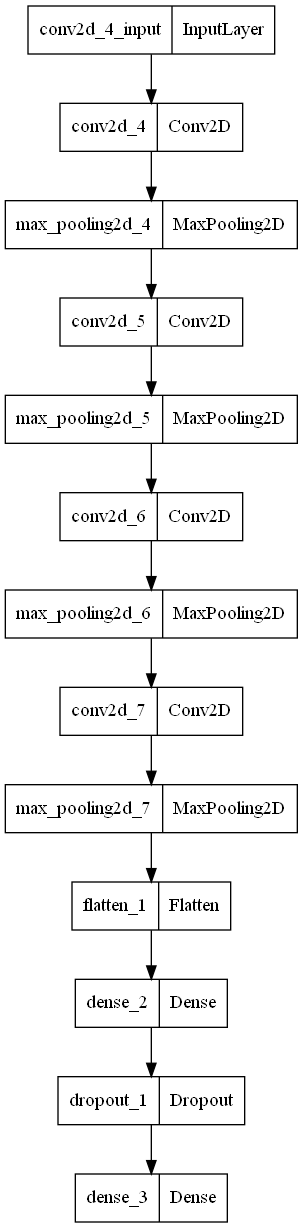

In [70]:
keras.utils.plot_model(model_CNN)

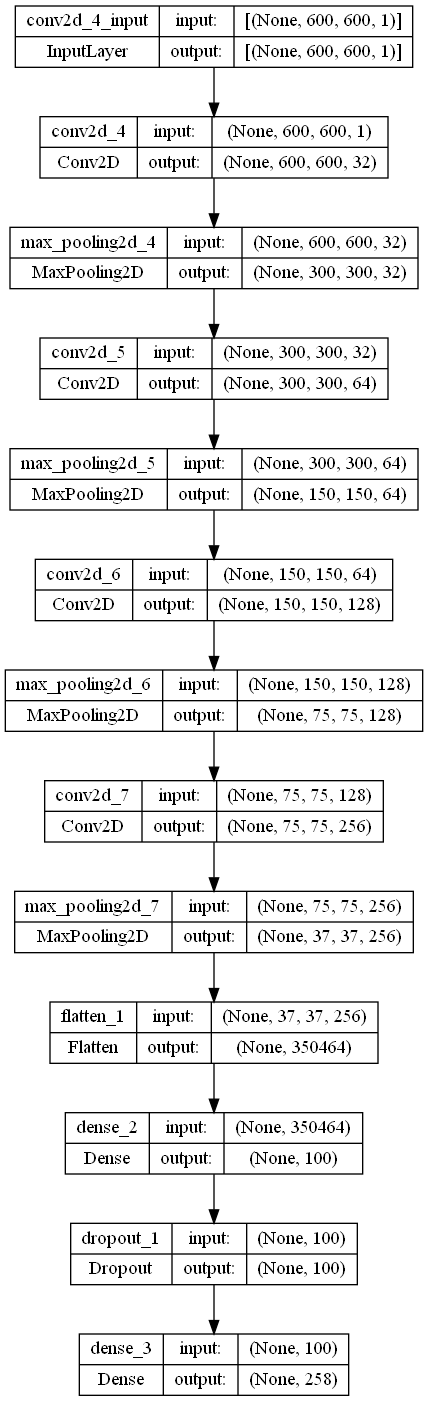

In [71]:
keras.utils.plot_model(model_CNN, show_shapes=True)

model_CNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model_CNN.fit(train_scaled, train_target, epochs=30, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [126]:
model_CNN2 = keras.models.load_model('./best-cnn-model.h5')
model_CNN2.evaluate(val_scaled, val_target)

14/14 [==============================] - 16s 1s/step - loss: 4.4647 - accuracy: 0.2241


[4.4646897315979, 0.22405660152435303]

# Test
## y_train first data ↓↓↓

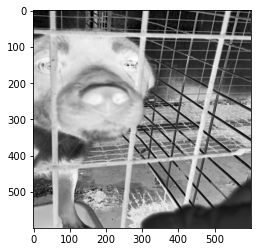

In [127]:
plt.imshow(val_scaled[0].reshape(600, 600), cmap='gray_r')
plt.show()

# Performance

# 위 사진에 대한 258개 확률 출력

In [133]:
preds = model_CNN2.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 119ms/step
[[3.27624002e-05 2.86907842e-03 1.58034163e-05 1.64902944e-03
  1.39079397e-08 1.95926847e-03 1.46263963e-04 1.04743121e-02
  1.06661528e-01 1.36345552e-04 3.57547748e-07 9.73505608e-04
  7.28059800e-12 3.72895492e-09 6.50729609e-11 1.96105709e-08
  3.50349298e-11 1.16379280e-12 2.96570685e-11 2.01723371e-09
  7.87798559e-12 7.77234613e-12 3.42816726e-12 5.16126786e-09
  9.18327220e-11 7.44762862e-11 4.10511833e-11 9.88143942e-11
  1.67690497e-11 7.55919546e-12 5.47944756e-09 4.55299730e-12
  4.97910935e-10 2.82291368e-09 1.30424482e-11 3.31122525e-11
  1.13842703e-11 8.63602689e-10 7.40303706e-13 1.04789831e-11
  5.68047887e-10 5.54838286e-10 2.33296932e-12 1.28267147e-10
  2.19156047e-11 7.23193554e-12 3.64860780e-10 7.88890689e-11
  1.16189613e-09 1.50967802e-12 1.92572736e-10 1.09336986e-12
  1.77585561e-12 5.49470087e-11 8.97516728e-10 1.02679096e-12
  6.61437661e-14 9.78380571e-11 4.05414715e-13 3.11181442e-10
  5.36294446e-11 

# 확률 그래프

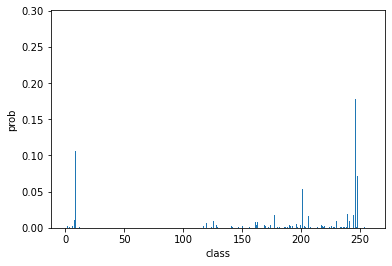

In [134]:
plt.bar(range(1, 259), preds[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()

# Total target (classes) < append

In [135]:
classes = []
for i in df['category'].unique():
    classes.append(i)

# 위 사진의 target

In [136]:
import numpy as np
print(classes[np.argmax(preds)])

6006


In [137]:
acc = model_CNN2.evaluate(val_scaled, val_target)

14/14 [==============================] - 16s 1s/step - loss: 4.4647 - accuracy: 0.2241


In [138]:
print("Accuracy : {:.2f}%".format(acc[1]*100))

Accuracy : 22.41%
